In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import statsmodels.api as sm 


In [2]:
# Load the CSV file
data = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', skiprows=3, skipfooter=1, engine='python')


Cleaning and Understanding the Data

In [3]:
# Display initial data information
print(data.info())

# Describe initial data 
print(data.describe())

# Check for null values 
print(data.isnull().sum())

# Check data type 
print(data.dtypes)

# Check if the data is unique
print(data.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  789 non-null    object
 1   Mkt-RF      789 non-null    object
 2   SMB         789 non-null    object
 3   HML         789 non-null    object
 4   RMW         789 non-null    object
 5   CMA         789 non-null    object
 6   RF          789 non-null    object
dtypes: object(7)
memory usage: 43.3+ KB
None
       Unnamed: 0    Mkt-RF       SMB       HML       RMW       CMA        RF
count         789       789       789       789       789       789       789
unique        789       634       576       565       498       501       153
top        196307      1.03      0.48      0.85      0.30     -0.34      0.00
freq            1         4         5         6         7         6        69
Unnamed: 0    1
Mkt-RF        1
SMB           1
HML           1
RMW           1
CMA           1
RF  

In [4]:
# Drop rows with any missing values
data_cleaned = data.dropna()
print(data_cleaned.isnull().sum())

print("Cleaned Data Info:")
print(data_cleaned.info())


Unnamed: 0    0
Mkt-RF        0
SMB           0
HML           0
RMW           0
CMA           0
RF            0
dtype: int64
Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 789
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  788 non-null    object
 1   Mkt-RF      788 non-null    object
 2   SMB         788 non-null    object
 3   HML         788 non-null    object
 4   RMW         788 non-null    object
 5   CMA         788 non-null    object
 6   RF          788 non-null    object
dtypes: object(7)
memory usage: 49.2+ KB
None


In [5]:
# Splitting the dataset into Monntly and Annual datasets

df_months = data_cleaned.iloc[:729]  # This includes rows from 0 to 729
df_years = data_cleaned.iloc[729:]  # This includes rows from 730 to the end of the DataFrame

# head to check the split
df_months.head()
df_years.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
731,1964,12.54,0.47,9.72,-3.34,6.87,3.54
732,1965,10.52,24.45,7.11,-0.93,-3.38,3.93
733,1966,-13.51,2.37,-0.86,0.00,-0.79,4.76
734,1967,24.49,50.51,-8.14,7.90,-15.31,4.21
735,1968,8.79,25.96,18.56,-13.60,16.53,5.21


In [6]:
# Rename the 'Unnamed' column to 'Months' and 'Years' in both parts
df_months = df_months.rename(columns={'Unnamed: 0': 'Years and Months'})
df_years= df_years.rename(columns={'Unnamed: 0': 'Years'})

In [7]:
# Convert relevant columns to numeric types
df_months[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']] = df_months[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].apply(pd.to_numeric, errors='coerce')
df_years[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']] = df_years[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].apply(pd.to_numeric, errors='coerce')


Graphing Data

Years and Months    datetime64[ns]
Mkt-RF                     float64
SMB                        float64
HML                        float64
RMW                        float64
CMA                        float64
RF                         float64
dtype: object


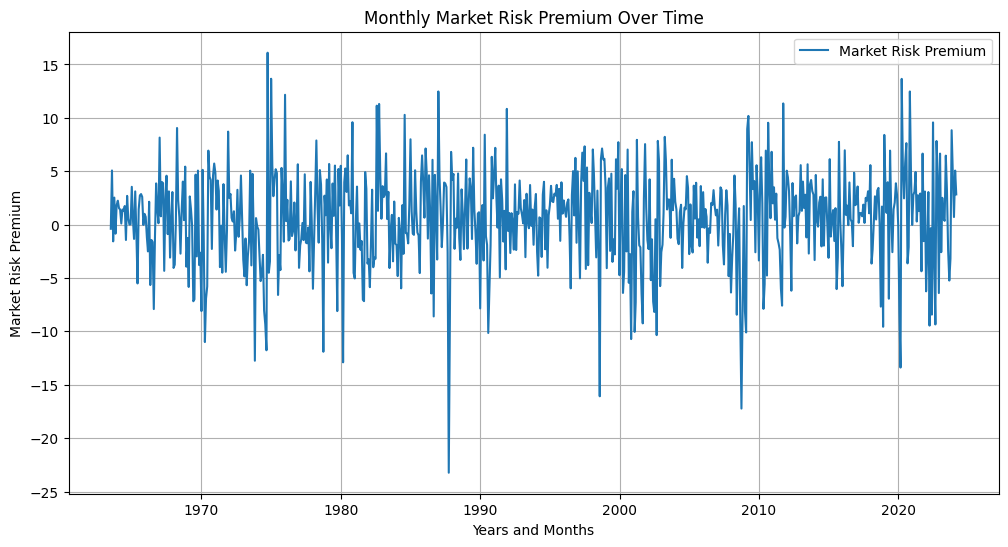

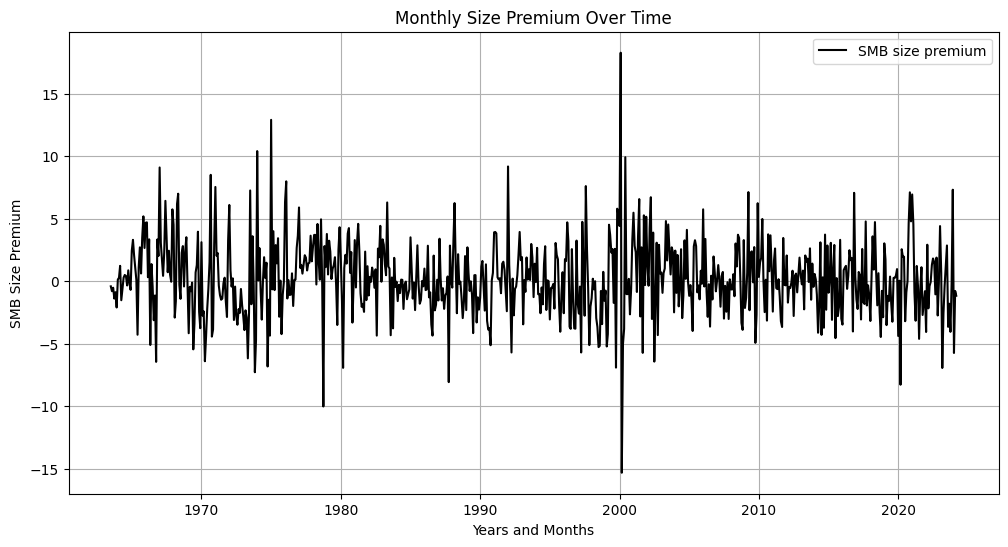

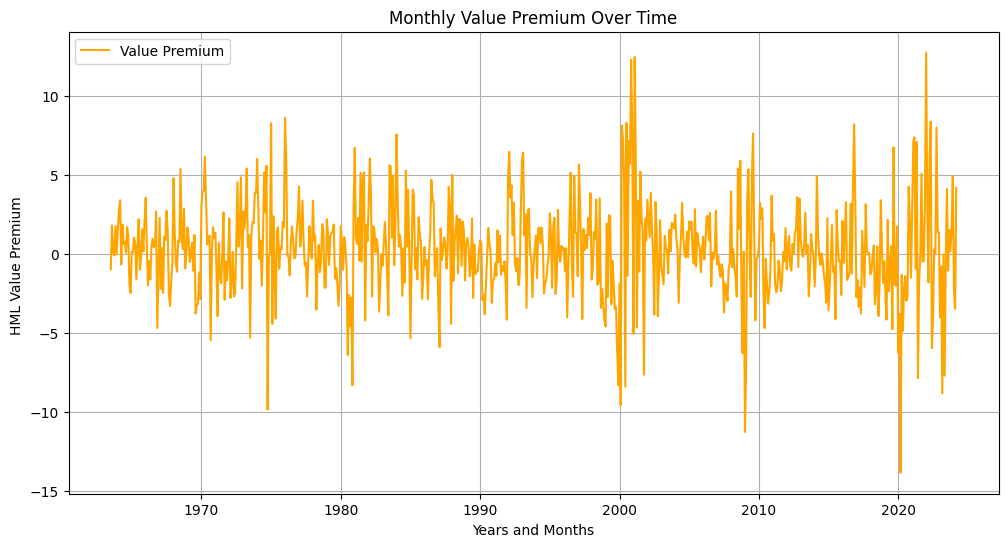

In [8]:
# converting 'Years and Months' and 'Years' to datetime format
df_months['Years and Months'] = pd.to_datetime(df_months['Years and Months'], format='%Y%m', errors='coerce')

print(df_months.dtypes)

# Plotting the line graph to understand data to determin M window

# 'Mkt-RF' for df_months - Monthly Market Risk Premium Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_months['Years and Months'], df_months['Mkt-RF'], label='Market Risk Premium')
plt.title('Monthly Market Risk Premium Over Time')
plt.xlabel('Years and Months')
plt.ylabel('Market Risk Premium')
plt.legend()
plt.grid(True)
plt.show()

# 'SMB' for df_months - Monthly Size Premium Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_months['Years and Months'], df_months['SMB'], label='SMB size premium',color='black')
plt.title('Monthly Size Premium Over Time')
plt.xlabel('Years and Months')
plt.ylabel('SMB Size Premium')
plt.legend()
plt.grid(True)
plt.show()


# for df_months_sorted - Monthly Value Premium Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_months['Years and Months'], df_months['HML'], label='Value Premium',color='orange')
plt.title('Monthly Value Premium Over Time')
plt.xlabel('Years and Months')
plt.ylabel('HML Value Premium ')
plt.legend()
plt.grid(True)
plt.show()


Question 3

In [9]:
# Setting the 'Date' column as the index of the DataFrame to make dates are available when the correlation matix is made late on.

# Convert the 'Date' column to datetime format if it's not already
df_months['Years and Months'] = pd.to_datetime(df_months['Years and Months'])

# Set the 'Date' column as the index of the DataFrame
df_months.set_index('Years and Months', inplace=True)

# Now df_months_sorted has dates as its index, you can proceed with further analysis
print(df_months.head())

                  Mkt-RF   SMB   HML   RMW   CMA    RF
Years and Months                                      
1963-07-01         -0.39 -0.41 -0.97  0.68 -1.18  0.27
1963-08-01          5.07 -0.80  1.80  0.36 -0.35  0.25
1963-09-01         -1.57 -0.52  0.13 -0.71  0.29  0.27
1963-10-01          2.53 -1.39 -0.10  2.80 -2.01  0.29
1963-11-01         -0.85 -0.88  1.75 -0.51  2.24  0.27


Q3 Part 1 -At every possible time t, use the data of the previous M periods to estimate the mean and covariance matrix of returns using the unbiase sample estimator for the mean and covariance matrix.

In [10]:
# Validation check - Checking if dimensions match to enshure no deminsion issues occur when creating Rolling Means and Rolling_covariances matrix

# Assuming df_months_sorted's 'Date' column is already set as the index and converted to datetime
print("Data range from:", df_months.index.min(), "to", df_months.index.max())

#The estimation window 𝑀 (window_size) refers to the number of periods (months, in this case) used to estimate the mean and covariance matrix of returns. Essentially, it is the historical look-back period used to compute these statistics. 

# If the data range is correct and there are no significant gaps, check the rolling calculations:

# Define multiple window sizes based on estimation window 𝑀 periods

window_sizes = [60, 120, 180]  

M1 = window_sizes[0] 
rolling_mean = df_months.rolling(window=M1).mean().dropna()
rolling_cov = df_months.rolling(window=M1).cov().dropna()

print("First valid rolling mean start at:", rolling_mean.index.min())
print("First valid rolling covariance start at:", rolling_cov.index.min())

Data range from: 1963-07-01 00:00:00 to 2024-03-01 00:00:00
First valid rolling mean start at: 1968-06-01 00:00:00
First valid rolling covariance start at: (Timestamp('1968-06-01 00:00:00'), 'CMA')


In [11]:
# All windows * Dictionary store *

#Storing Results: Results for each window size are stored in a dictionary results, which is indexed by the window size. 
#This makes it easy to access the rolling means and covariances for any specific window later on.

# Define multiple window sizes
window_sizes = [60, 120, 180]  # Example windows in months

# Dictionary to store results for each window size
results = {}

for M in window_sizes:
    # Calculate rolling means and covariances with at least M data points to form a full window
    rolling_means = df_months.rolling(window=M, min_periods=M).mean().dropna()
    rolling_covariances = df_months.rolling(window=M, min_periods=M).cov(pairwise=True).dropna()

    # Store results in the dictionary
    results[M] = {
        'rolling_means': rolling_means,
        'rolling_covariances': rolling_covariances
    }

    # Display the first few results to verify
    print(f"Results for Window Size {M} Months:")
    print("Rolling Means (First Entries):")
    print(rolling_means.head())
    print("\nRolling Covariances (First Entries):")
    print(rolling_covariances.head())
    print("\n" + "-"*50 + "\n")

Results for Window Size 60 Months:
Rolling Means (First Entries):
                    Mkt-RF       SMB       HML       RMW       CMA        RF
Years and Months                                                            
1968-06-01        0.692333  1.122500  0.301500  0.055167 -0.098500  0.336833
1968-07-01        0.653500  1.105833  0.407500 -0.008333 -0.016833  0.340333
1968-08-01        0.591333  1.157000  0.394333 -0.026000 -0.003000  0.343167
1968-09-01        0.684667  1.212500  0.397167 -0.047333  0.006667  0.345833
1968-10-01        0.649500  1.228667  0.446500 -0.116000  0.085167  0.348333

Rolling Covariances (First Entries):
                           Mkt-RF       SMB       HML       RMW       CMA  \
Years and Months                                                            
1968-06-01       Mkt-RF  9.114740  3.956409  0.345166  1.018764 -1.974861   
                 SMB     3.956409  8.462795  0.398081  0.282968 -1.850463   
                 HML     0.345166  0.398081  3.16

In [12]:
# Accessing dictionary to pull out M1 results

#'results' is the dictionary containing all the rolling statistics.
#'window_sizes' is the list [60, 120, 180] as previously defined.

# Access the results for the first window size, which is 60 months
M1_window_size = window_sizes[0]  

# Retrieve the rolling means and covariances for M1 (60 months)
M1_rolling_means = results[M1_window_size]['rolling_means']
M1_rolling_covariances = results[M1_window_size]['rolling_covariances']

# Print the results for M1
print(f"Rolling Means for Window Size {M1_window_size} Months:")
print(M1_rolling_means.tail())
print("\nRolling Covariances for Window Size {M1_window_size} Months:")
print(M1_rolling_covariances.tail(6))

Rolling Means for Window Size 60 Months:
                    Mkt-RF       SMB       HML       RMW       CMA        RF
Years and Months                                                            
2023-11-01        0.944167 -0.221333 -0.145833  0.659167  0.120333  0.143833
2023-12-01        1.184833 -0.051333 -0.033000  0.608333  0.138833  0.147667
2024-01-01        1.056667 -0.197500 -0.065000  0.633167  0.148000  0.152000
2024-02-01        1.084333 -0.239500 -0.078667  0.598000  0.138833  0.156000
2024-03-01        1.113167 -0.200333  0.060667  0.607667  0.174333  0.160000

Rolling Covariances for Window Size {M1_window_size} Months:
                            Mkt-RF        SMB        HML       RMW       CMA  \
Years and Months                                                               
2024-03-01       Mkt-RF  30.241198   5.843789   1.562332  1.155724 -3.166621   
                 SMB      5.843789  10.091396   5.296556 -3.171157  0.226020   
                 HML      1.562332   5

In [13]:
# Accessing dictionary to pull out M2 results

# Assuming 'results' is the dictionary containing all the rolling statistics
# and 'window_sizes' is the list [60, 120, 180] as previously defined

# Access the results for the second window size, which is 120 months
M2_window_size = window_sizes[1]  # This gets 120 from the list [60, 120, 180]

# Retrieve the rolling means and covariances for M2 (120 months)
M2_rolling_means = results[M2_window_size]['rolling_means']
M2_rolling_covariances = results[M2_window_size]['rolling_covariances']

# Print the results for M2
print(f"Rolling Means for Window Size {M2_window_size} Months:")
print(M2_rolling_means.tail())
print("\nRolling Covariances for Window Size {M2_window_size} Months:")
print(M2_rolling_covariances.tail(6))

Rolling Means for Window Size 120 Months:
                    Mkt-RF       SMB       HML       RMW       CMA        RF
Years and Months                                                            
2023-11-01        0.901667 -0.199333 -0.178500  0.383417 -0.039750  0.093667
2023-12-01        0.918833 -0.134583 -0.137250  0.361667 -0.029500  0.097250
2024-01-01        0.952417 -0.187250 -0.139833  0.399750 -0.025667  0.101167
2024-02-01        0.955833 -0.194917 -0.166333  0.385083 -0.039750  0.104667
2024-03-01        0.975833 -0.195500 -0.172500  0.379667 -0.045917  0.108250

Rolling Covariances for Window Size {M2_window_size} Months:
                            Mkt-RF       SMB        HML       RMW       CMA  \
Years and Months                                                              
2024-03-01       Mkt-RF  20.626109  4.293232   0.427897  0.095473 -2.267492   
                 SMB      4.293232  8.638948   3.323405 -2.545188  0.180937   
                 HML      0.427897  3.323

In [14]:
# Accessing dictionary to pull out M3 results

# Assuming 'results' is the dictionary containing all the rolling statistics
# and 'window_sizes' is the list [60, 120, 180] as previously defined

# Access the results for the third window size, which is 180 months
M3_window_size = window_sizes[2]  # This gets 180 from the list [60, 120, 180]

# Retrieve the rolling means and covariances for M3 (180 months)
M3_rolling_means = results[M3_window_size]['rolling_means']
M3_rolling_covariances = results[M3_window_size]['rolling_covariances']

# Print the results for M3
print(f"Rolling Means for Window Size {M3_window_size} Months:")
print(M3_rolling_means.tail())
print("\nRolling Covariances for Window Size {M3_window_size} Months:")
print(M3_rolling_covariances.tail(6))

Rolling Means for Window Size 180 Months:
                    Mkt-RF       SMB       HML       RMW       CMA        RF
Years and Months                                                            
2023-11-01        1.114944  0.010944 -0.141500  0.288111  0.047333  0.064056
2023-12-01        1.132333  0.033333 -0.114889  0.270722  0.062944  0.066444
2024-01-01        1.181389  0.013333 -0.065389  0.273556  0.064111  0.069056
2024-02-01        1.265611  0.016333 -0.046167  0.255889  0.057889  0.071333
2024-03-01        1.231611  0.006167 -0.042167  0.278111  0.076944  0.073611

Rolling Covariances for Window Size {M3_window_size} Months:
                            Mkt-RF       SMB        HML       RMW       CMA  \
Years and Months                                                              
2024-03-01       Mkt-RF  19.616885  4.568114   1.776507 -0.879160 -0.998192   
                 SMB      4.568114  7.582159   2.807821 -2.108073  0.356499   
                 HML      1.776507  2.807

Finding target return - using CAPM and historical mean returns

In [15]:
# Calculate historical mean returns for each factor
historical_mean_returns = df_months.mean()

# Calculate the historical mean return of the portfolio
# Assuming equal weight for each factor
num_factors = len(historical_mean_returns) - 1  
equal_weights = np.array([1. / num_factors] * num_factors)
historical_portfolio_mean_return = np.dot(equal_weights, historical_mean_returns[:-1])  

print(f"Historical Mean Returns:\n{historical_mean_returns}")
print(f"\nHistorical Portfolio Mean Return: {historical_portfolio_mean_return}")

# Save results to a file (optional)
# Create a DataFrame for historical mean returns
HMP_results = pd.DataFrame({
    'Historical Mean Returns': historical_mean_returns })

Historical Mean Returns:
Mkt-RF    0.577558
SMB       0.203224
HML       0.288189
RMW       0.282305
CMA       0.268971
RF        0.363045
dtype: float64

Historical Portfolio Mean Return: 0.32404938271604944


In [16]:
# Using CAPM to identify target return

# Calculate the excess market returns (Mkt-RF) and risk-free rate (RF)

df_months['Mkt'] = df_months['Mkt-RF'] + df_months['RF']

# Define the portfolio returns (for example, using equal weights for each factor)
portfolio_weights = np.array([1/6] * 6)  # Excluding RF
df_months['Portfolio_Return'] = (df_months[['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'RF']] @ portfolio_weights)

# Perform regression analysis to calculate beta
X = sm.add_constant(df_months['Mkt-RF'])
y = df_months['Portfolio_Return'] - df_months['RF']
model = sm.OLS(y, X).fit()
beta_a = model.params['Mkt-RF']

print(f"Calculated Beta (β): {beta_a}")

# Calculate the means of the last period for Mkt-RF and RF
mean_mkt_rf = df_months['Mkt-RF'].mean()
mean_rf = df_months['RF'].mean()

# Calculate the expected return using the formula
MRKTexpected_return = mean_rf + beta_a * (mean_mkt_rf)

print(f"Mean Market Risk Premium (Mkt-RF): {mean_mkt_rf}")
print(f"Mean Risk-Free Rate (RF): {mean_rf}")
print(f"CAPM Expected Return: {MRKTexpected_return}")

Calculated Beta (β): 0.1354719334789754
Mean Market Risk Premium (Mkt-RF): 0.5775582990397805
Mean Risk-Free Rate (RF): 0.36304526748971194
CAPM Expected Return: 0.4412882069574593


In [17]:
# Average Target

MTarget_return_final = (historical_portfolio_mean_return + MRKTexpected_return)/ 2
print(MTarget_return_final)

0.38266879483675437


Q3 Part 2 -Use these estimates as inputs for a single-period mean-variance portfolio optimization problem with an expected return constraint determined by yourself. Solve this problem to determine the optimal portfolio at time t. 

In [18]:
# Mean-Variance Optimization Function
def portfolio_optimization(mean_returns, cov_matrix, target_return):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    
    def portfolio_variance(weights, mean_returns, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
    )
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(portfolio_variance,
                      num_assets * [1. / num_assets],
                      args=args,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)
    return result.x


target_return = 0.38  

# Perform optimization for each estimation window
optimization_results_min_portfolio = {}

for M in window_sizes:
    mean_returns = results[M]['rolling_means'].iloc[-1]
    cov_matrix = results[M]['rolling_covariances'].iloc[-len(mean_returns):, -len(mean_returns):]

    optimal_weights = portfolio_optimization(mean_returns, cov_matrix, target_return)
    
    # Calculate expected return and variance of the optimized portfolio
    expected_return = np.dot(optimal_weights, mean_returns)
    portfolio_variance = np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))
    
    optimization_results_min_portfolio[M] = {
        'optimal_weights': optimal_weights,
        'expected_return': expected_return,
        'portfolio_variance': portfolio_variance,
        'portfolio_std_dev': np.sqrt(portfolio_variance)
    }
    
    # Print the detailed results for each window size
    print(f"Optimal Weights for Window Size {M} Months:")
    for asset, weight in zip(mean_returns.index, optimal_weights):
        print(f"{asset}: {weight:.4f}")

    print(f"\nTarget Expected Return: {target_return:.4f}")
    print(f"Expected Return of Optimized Portfolio: {expected_return:.4f}")
    print(f"Variance of Optimized Portfolio: {portfolio_variance:.4f}")
    print(f"Standard Deviation of Optimized Portfolio: {np.sqrt(portfolio_variance):.4f}") # Print first 5 portfolio returns for brevity
    print("\n" + "-"*50 + "\n")

Optimal Weights for Window Size 60 Months:
Mkt-RF: 0.1170
SMB: 0.0000
HML: 0.0000
RMW: 0.2417
CMA: 0.0177
RF: 0.6235

Target Expected Return: 0.3800
Expected Return of Optimized Portfolio: 0.3800
Variance of Optimized Portfolio: 0.8699
Standard Deviation of Optimized Portfolio: 0.9327

--------------------------------------------------

Optimal Weights for Window Size 120 Months:
Mkt-RF: 0.2156
SMB: 0.0000
HML: 0.0000
RMW: 0.3120
CMA: 0.0000
RF: 0.4724

Target Expected Return: 0.3800
Expected Return of Optimized Portfolio: 0.3800
Variance of Optimized Portfolio: 1.4058
Standard Deviation of Optimized Portfolio: 1.1857

--------------------------------------------------

Optimal Weights for Window Size 180 Months:
Mkt-RF: 0.2231
SMB: 0.0000
HML: 0.0000
RMW: 0.2343
CMA: 0.0348
RF: 0.5078

Target Expected Return: 0.3800
Expected Return of Optimized Portfolio: 0.3800
Variance of Optimized Portfolio: 1.0936
Standard Deviation of Optimized Portfolio: 1.0458

---------------------------------

Q3 Part 3 - Compute the return obtained by this portfolio in the investment period from t to t+1. 

In [19]:
def portfolio_optimization(mean_returns, cov_matrix, target_return):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    
    def portfolio_variance(weights, mean_returns, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
    )
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(portfolio_variance,
                      num_assets * [1. / num_assets],
                      args=args,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)
    return result.x

# target return
target_return = 0.38  
optimization_results = {}

for M in window_sizes:
    rolling_means = results[M]['rolling_means']
    rolling_covariances = results[M]['rolling_covariances']
    
    portfolio_returns = []
    optimal_weights_all = []
    for t in range(len(rolling_means) - 1):
        mean_returns = rolling_means.iloc[t][['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']]
        cov_matrix = rolling_covariances.loc[rolling_means.index[t]].loc[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'], ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']]

        # Solve the optimization problem
        optimal_weights = portfolio_optimization(mean_returns, cov_matrix, target_return)
        optimal_weights_all.append(optimal_weights)
        
        # Compute the return obtained by this portfolio in the investment period from t to t+1
        next_period_return = np.dot(optimal_weights, df_months.iloc[t + M][['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].values)
        portfolio_returns.append(next_period_return)
    
    # Compute the portfolio's expected return and variance for the last period
    expected_return = np.dot(optimal_weights, mean_returns)
    portfolio_variance = np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))
    
    optimization_results[M] = {
        'optimal_weights': optimal_weights,
        'expected_return': expected_return,
        'portfolio_variance': portfolio_variance,
        'portfolio_std_dev': np.sqrt(portfolio_variance),
        'portfolio_returns': portfolio_returns
    }

    # Print the detailed results for each window size
    print(f"Optimal Weights for Window Size {M} Months:")
    for asset, weight in zip(mean_returns.index, optimal_weights):
        print(f"{asset}: {weight:.4f}")

    print(f"\nTarget Expected Return: {target_return:.4f}")
    print(f"Expected Return of Optimized Portfolio: {expected_return:.4f}")
    print(f"Variance of Optimized Portfolio: {portfolio_variance:.4f}")
    print(f"Standard Deviation of Optimized Portfolio: {np.sqrt(portfolio_variance):.4f}")
    print(f"Portfolio Returns: {portfolio_returns[:5]}")  # Print first 5 portfolio returns for brevity
    print("\n" + "-"*50 + "\n")

# If you want to print all optimization results
for M, result in optimization_results.items():
    print(f"Results for Window Size {M} Months:")
    print(f"Optimal Weights: {result['optimal_weights']}")
    print(f"Expected Return: {result['expected_return']}")
    print(f"Portfolio Variance: {result['portfolio_variance']}")
    print(f"Portfolio Standard Deviation: {result['portfolio_std_dev']}")
    print(f"Portfolio Returns: {result['portfolio_returns'][:5]}")  # Print first 5 portfolio returns for brevity
    print("\n" + "="*50 + "\n")


Optimal Weights for Window Size 60 Months:
Mkt-RF: 0.1191
SMB: 0.0000
HML: 0.0000
RMW: 0.2568
CMA: 0.0029
RF: 0.6212

Target Expected Return: 0.3800
Expected Return of Optimized Portfolio: 0.3800
Variance of Optimized Portfolio: 0.9340
Standard Deviation of Optimized Portfolio: 0.9665
Portfolio Returns: [0.36953888141272523, 0.5198956069310038, 0.5366149951890886, 0.4142274017002568, 0.47996073444852005]

--------------------------------------------------

Optimal Weights for Window Size 120 Months:
Mkt-RF: 0.2156
SMB: 0.0000
HML: 0.0000
RMW: 0.3275
CMA: 0.0000
RF: 0.4569

Target Expected Return: 0.3800
Expected Return of Optimized Portfolio: 0.3800
Variance of Optimized Portfolio: 1.4444
Standard Deviation of Optimized Portfolio: 1.2018
Portfolio Returns: [0.6490844488409039, 0.6169931920715013, 0.6631959986394129, 0.5762800468669347, 0.30622198684106017]

--------------------------------------------------

Optimal Weights for Window Size 180 Months:
Mkt-RF: 0.2246
SMB: 0.0000
HML: 0.

Question 4 - Use Rolling estimates as inputs for a single-period minimum-variance portfolio optimization problem, i.e. a mean-variance problem without constraint for the mean. Compute the return obtained by this portfolio in the investment period from t to t+1.

In [20]:
def min_variance_portfolio(min_cov_matrix):
    min_num_assets = len(min_cov_matrix)
    min_args = (min_cov_matrix,)
    
    def min_portfolio_variance(weights, min_cov_matrix):
        return np.dot(weights.T, np.dot(min_cov_matrix, weights))
    
    min_constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    )
    min_bounds = tuple((0, 1) for asset in range(min_num_assets))
    min_result = minimize(min_portfolio_variance,
                          min_num_assets * [1. / min_num_assets],
                          args=min_args,
                          method='SLSQP',
                          bounds=min_bounds,
                          constraints=min_constraints)
    return min_result.x

min_optimization_results = {}

for M in window_sizes:
    min_rolling_means = results[M]['rolling_means']
    min_rolling_covariances = results[M]['rolling_covariances']
    
    min_portfolio_returns = []
    min_optimal_weights_all = []
    for t in range(len(min_rolling_means) - 1):
        min_mean_returns = min_rolling_means.iloc[t][['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']]
        min_cov_matrix = min_rolling_covariances.loc[min_rolling_means.index[t]].loc[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'], ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']]

        # Solve the optimization problem
        min_optimal_weights = min_variance_portfolio(min_cov_matrix)
        min_optimal_weights_all.append(min_optimal_weights)
        
        # Compute the return obtained by this portfolio in the investment period from t to t+1
        min_next_period_return = np.dot(min_optimal_weights, df_months.iloc[t + M][['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']].values)
        min_portfolio_returns.append(min_next_period_return)
    
    # Compute the portfolio's expected return and variance for the last period
    min_expected_return = np.dot(min_optimal_weights, min_mean_returns)
    min_portfolio_variance = np.dot(min_optimal_weights.T, np.dot(min_cov_matrix, min_optimal_weights))
    
    min_optimization_results[M] = {
        'optimal_weights': min_optimal_weights,
        'expected_return': min_expected_return,
        'portfolio_variance': min_portfolio_variance,
        'portfolio_std_dev': np.sqrt(min_portfolio_variance),
        'portfolio_returns': min_portfolio_returns
    }

    # Print the detailed results for each window size
    print(f"Optimal Weights for Window Size {M} Months:")
    for asset, weight in zip(min_mean_returns.index, min_optimal_weights):
        print(f"{asset}: {weight:.4f}")

    print(f"Expected Return of Optimized Portfolio: {min_expected_return:.4f}")
    print(f"Variance of Optimized Portfolio: {min_portfolio_variance:.4f}")
    print(f"Standard Deviation of Optimized Portfolio: {np.sqrt(min_portfolio_variance):.4f}")
    print(f"Portfolio Returns: {min_portfolio_returns[:5]}")  # Print first 5 portfolio returns for brevity
    print("\n" + "-"*50 + "\n")

# If you want to print all optimization results
for M, result in min_optimization_results.items():
    print(f"Results for Window Size {M} Months:")
    print(f"Optimal Weights: {result['optimal_weights']}")
    print(f"Expected Return: {result['expected_return']}")
    print(f"Portfolio Variance: {result['portfolio_variance']}")
    print(f"Portfolio Standard Deviation: {result['portfolio_std_dev']}")
    print(f"Portfolio Returns: {result['portfolio_returns'][:5]}")  # Print first 5 portfolio returns for brevity
    print("\n" + "="*50 + "\n")

Optimal Weights for Window Size 60 Months:
Mkt-RF: 0.0000
SMB: 0.0145
HML: 0.0000
RMW: 0.0141
CMA: 0.0111
RF: 0.9603
Expected Return of Optimized Portfolio: 0.1563
Variance of Optimized Portfolio: 0.0229
Standard Deviation of Optimized Portfolio: 0.1515
Portfolio Returns: [0.4780713110772997, 0.4109780569740531, 0.41514802748214563, 0.4368883490763596, 0.410714159206336]

--------------------------------------------------

Optimal Weights for Window Size 120 Months:
Mkt-RF: 0.0000
SMB: 0.0101
HML: 0.0000
RMW: 0.0109
CMA: 0.0083
RF: 0.9707
Expected Return of Optimized Portfolio: 0.1035
Variance of Optimized Portfolio: 0.0166
Standard Deviation of Optimized Portfolio: 0.1290
Portfolio Returns: [0.6535556391812879, 0.633260052206356, 0.6736955080015632, 0.5950397890411893, 0.39442674041715897]

--------------------------------------------------

Optimal Weights for Window Size 180 Months:
Mkt-RF: 0.0008
SMB: 0.0084
HML: 0.0000
RMW: 0.0073
CMA: 0.0094
RF: 0.9741
Expected Return of Optimize

Question 5 - At every time used in the previous step, compute the return obtained by the portfolio with weight 1/N for each of N available assets in the investment period from t to t+1.

Naive Single point

In [21]:
# Naive Single

# Define assets
assets = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']

# Calculate overall mean and covariance
mean_returns = df_months.mean()
cov_matrix = df_months.cov()

# Calculate naive portfolio
def naive_portfolio(mean_returns, cov_matrix, assets):
    num_assets = len(assets)
    equal_weights = np.array([1. / num_assets] * num_assets)

    expected_return = np.dot(equal_weights, mean_returns)
    portfolio_variance = np.dot(equal_weights.T, np.dot(cov_matrix, equal_weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)

    return equal_weights, expected_return, portfolio_variance, portfolio_std_dev

# Calculate naive portfolio results
naive_equal_weights, naive_expected_return, naive_portfolio_variance, naive_portfolio_std_dev = naive_portfolio(
    mean_returns[assets], cov_matrix.loc[assets, assets], assets
)

# Print the results
print("Equal Weights Portfolio:")
for asset, weight in zip(assets, naive_equal_weights):
    print(f"{asset}: {weight:.4f}")

print(f"\nExpected Return of Equal Weighted Portfolio: {naive_expected_return:.4f}")
print(f"Variance of Equal Weighted Portfolio: {naive_portfolio_variance:.4f}")
print(f"Standard Deviation of Equal Weighted Portfolio: {naive_portfolio_std_dev:.4f}")

# Calculate the return obtained by this portfolio in the investment period from t to t+1
portfolio_returns_equal_weighted = []
for t in range(len(df_months) - 1):
    next_period_return = np.dot(naive_equal_weights, df_months.iloc[t + 1][assets].values)
    portfolio_returns_equal_weighted.append(next_period_return)

# Convert portfolio returns to a DataFrame for better readability
portfolio_returns_equal_weighted_df = pd.DataFrame(portfolio_returns_equal_weighted, columns=['Portfolio Return'])

# Print the first few portfolio returns
print("\nPortfolio Returns (First 5):")
print(portfolio_returns_equal_weighted_df.head())

Equal Weights Portfolio:
Mkt-RF: 0.1667
SMB: 0.1667
HML: 0.1667
RMW: 0.1667
CMA: 0.1667
RF: 0.1667

Expected Return of Equal Weighted Portfolio: 0.3305
Variance of Equal Weighted Portfolio: 1.1889
Standard Deviation of Equal Weighted Portfolio: 1.0904

Portfolio Returns (First 5):
   Portfolio Return
0          1.055000
1         -0.351667
2          0.353333
3          0.336667
4         -0.006667


Question 6 -Compute the sample mean and sample variance of returns for each strategy (optimal meanvariance (Step 3), optimal minimum variance (Step 4), and naïve 1/N (Step 5)) and for each choice of M. This will yield 9 realized mean-variance pairs. Show these pairs both in tabular form and on a mean-standard deviation diagram. 

In [22]:
Final_values = {
    'Method': [],
    'Expected Return': [],
    'Variance': [],
    'Standard Deviation': []
}

# Collect the results from the Naive Single model
Final_values['Method'].append('Naive Portfolio')
Final_values['Expected Return'].append(naive_expected_return)
Final_values['Variance'].append(naive_portfolio_variance)
Final_values['Standard Deviation'].append(naive_portfolio_std_dev)

# Collect the results from the Minimum-Variance model
for M in min_optimization_results.keys():
    Final_values['Method'].append(f"Minimum-Variance Portfolio ({M} Months)")
    Final_values['Expected Return'].append(min_optimization_results[M]['expected_return'])
    Final_values['Variance'].append(min_optimization_results[M]['portfolio_variance'])
    Final_values['Standard Deviation'].append(min_optimization_results[M]['portfolio_std_dev'])

# Collect the results from the Mean-Variance model
for M in optimization_results.keys():
    Final_values['Method'].append(f"Mean-Variance Portfolio ({M} Months)")
    Final_values['Expected Return'].append(optimization_results[M]['expected_return'])
    Final_values['Variance'].append(optimization_results[M]['portfolio_variance'])
    Final_values['Standard Deviation'].append(optimization_results[M]['portfolio_std_dev'])

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(Final_values)

# Print the DataFrame
print(results_df)

                                    Method  Expected Return  Variance  \
0                          Naive Portfolio         0.330549  1.188881   
1   Minimum-Variance Portfolio (60 Months)         0.156299  0.022941   
2  Minimum-Variance Portfolio (120 Months)         0.103496  0.016634   
3  Minimum-Variance Portfolio (180 Months)         0.073089  0.013212   
4      Mean-Variance Portfolio (60 Months)         0.380000  0.934040   
5     Mean-Variance Portfolio (120 Months)         0.380000  1.444380   
6     Mean-Variance Portfolio (180 Months)         0.380000  1.089446   

   Standard Deviation  
0            1.090358  
1            0.151462  
2            0.128973  
3            0.114944  
4            0.966457  
5            1.201824  
6            1.043765  


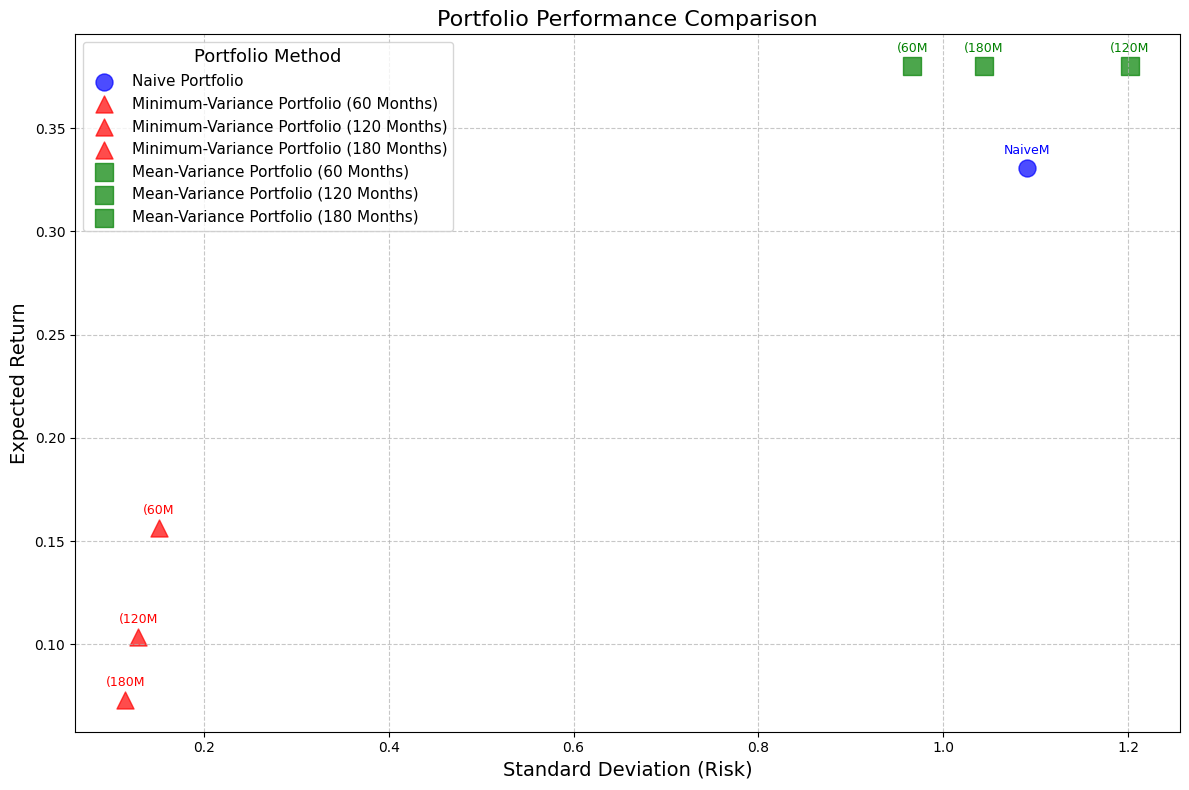

In [23]:
#Ploting

plt.figure(figsize=(12, 8))
color_map = {
    'Naive Portfolio': 'b',
    'Minimum-Variance Portfolio': 'r',
    'Mean-Variance Portfolio': 'g'
}
marker_map = {
    'Naive Portfolio': 'o',
    'Minimum-Variance Portfolio': '^',
    'Mean-Variance Portfolio': 's'
}

for method in results_df['Method'].unique():
    if 'Naive' in method:
        color = color_map['Naive Portfolio']
        marker = marker_map['Naive Portfolio']
    elif 'Minimum-Variance' in method:
        color = color_map['Minimum-Variance Portfolio']
        marker = marker_map['Minimum-Variance Portfolio']
    elif 'Mean-Variance' in method:
        color = color_map['Mean-Variance Portfolio']
        marker = marker_map['Mean-Variance Portfolio']
    
    method_data = results_df[results_df['Method'] == method]
    plt.scatter(method_data['Standard Deviation'], method_data['Expected Return'], 
                color=color, marker=marker, s=150, label=method, alpha=0.7)

    for i in range(len(method_data)):
        plt.annotate(f"{method_data.iloc[i]['Method'].split()[-2]}M", 
                     (method_data.iloc[i]['Standard Deviation'], method_data.iloc[i]['Expected Return']),
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color=color)

plt.title('Portfolio Performance Comparison', fontsize=16)
plt.xlabel('Standard Deviation (Risk)', fontsize=14)
plt.ylabel('Expected Return', fontsize=14)
plt.legend(title='Portfolio Method', title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()